# NMDS
- https://dev.classmethod.jp/articles/mds-for-parks/
- https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.braycurtis.html

---
## Agenda
1. **First Example (MDS)**
    1. Import libraries
    1. Create data
        - The distance between five main prefecture in Japan
    1. Create MDS class
    1. Apply MDS
1. **Second Example (NMDS)**
    1. Create data
    1. Calculate Bray Curtis Distance
    1. Create NMDS class
    1. Apply NMDS
1. **Export data for R**
---

## Import Libraries
- Using sklearn to execute MDS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
"""↓ Library for nmds """
from sklearn import manifold

## Create Data
- Tokyo / Osaka / Fukuoka / Hokkaido / Tokushima

In [2]:
dist_japan = [[0, 401, 886, 835, 506],
              [401, 0, 486, 1060, 111],
              [886, 486, 0, 1421, 388],
              [835, 1060, 1421, 0, 1162],
              [506, 111, 388, 1162, 0]]

## Create MDS Class
- n_components : The number of scale we transform
- dissimilarity : "precomputed" or "euclidean"
    1. "precomputed" : The input data is already in distance matrix
    1. "euclidean" : Translate the input data to euclidean distance matrix

In [3]:
mds = manifold.MDS(n_components=2, 
                   dissimilarity = "precomputed",
                   metric = True,
                   random_state = 6)

## Apply MDS

In [4]:
pos = mds.fit_transform(dist_japan)

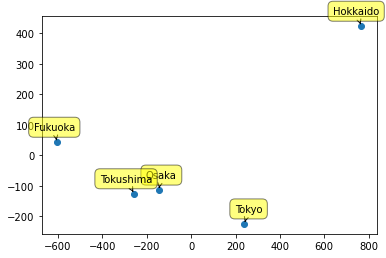

In [6]:
# labels for plot
labels = ["Tokyo", "Osaka", "Fukuoka", "Hokkaido", "Tokushima"]

# plot the data
plt.scatter(pos[:, 0], -pos[:, 1], marker = 'o')

# Annotate the data
for label, x, y in zip(labels, pos[:, 0], -pos[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (18, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
    )

plt.show()

---
# Second example
- Sampling some species from each site

## Create Data 

In [7]:
# Species data
species = [[120, 60, 120, 30, 50],
           [600, 720, 230, 400, 500],
           [50, 80, 20, 150, 200],
           [225, 230, 320, 20, 10],
           [1200, 2300, 500, 230,10],
           [600, 363, 150, 200 , 200]]
# label
labels = ["Site1", "Site2", "Site3", "Site4", "Site5"]
index = ["S_1", "S_2", "S_3", "S_4", "S_5", "S_6"]

In [14]:
# Arrange the data
species_df = pd.DataFrame(species, columns = labels, index = index)
species_val = species_df.values.T
species_df

Site1  Site2  Site3  Site4  Site5
S_1    120     60    120     30     50
S_2    600    720    230    400    500
S_3     50     80     20    150    200
S_4    225    230    320     20     10
S_5   1200   2300    500    230     10
S_6    600    363    150    200    200

## Calculate the Bray curtis distance

In [9]:
# Calculate Bray Curtis dissimilarity matrix
from scipy.spatial import distance

# Declare a table and a array to preserve result
table = {}
bray_curtis = []
num_site = len(species_val)

# Create the bray curtis matrix
for i in range(num_site) :
    current_dist = []
    for j in range(num_site):
        if  not (i,j) in table or (j,i) in table:
            table[(i,j)] = distance.braycurtis(species[i],species[j])
            table[(j,i)] = table[(i,j)]
        current_dist.append(table[(i,j)])
    bray_curtis.append(current_dist)

In [10]:
pd.DataFrame(bray_curtis)

0         1         2         3         4
0  0.000000  0.731449  0.522727  0.443038  0.852814
1  0.731449  0.000000  0.661017  0.560676  0.464873
2  0.522727  0.661017  0.000000  0.724138  0.869198
3  0.443038  0.560676  0.724138  0.000000  0.680872
4  0.852814  0.464873  0.869198  0.680872  0.000000

## Create the NMDS class
- metric : 
    - True (default) => parametric
    - False => non-parametric

In [11]:
mds = manifold.MDS(n_components=2, 
                   dissimilarity = "precomputed",
                   metric = False,
                   random_state = 6)

## Apply NMDS

In [12]:
pos = mds.fit_transform(bray_curtis)

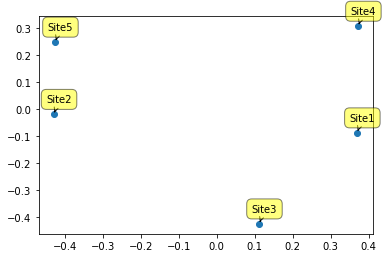

In [13]:
plt.scatter(pos[:, 0], -pos[:, 1], marker = 'o')

for label, x, y in zip(labels, pos[:, 0], -pos[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (18, 10),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
    )

plt.show()

---
# Export the data to use at R

In [17]:
species_df.to_csv("./species_data.csv", index = False)